In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

**3.**
B)

In [17]:
def system2(y,t):
  dNkdt= -0.5*y[0]
  dNbdt= 0.5*y[0] - 0.3*y[1]
  dNcdt= 0.3*y[1]

  return [dNkdt, dNbdt, dNcdt]

In [18]:
y0 = [500,0,0]

t = np.linspace(0, 10, 50)

solution = odeint(system2, y0, t)

In [19]:
y1_solution = solution[:, 0]
y2_solution = solution[:, 1]
y3_solution = solution[:, 2]

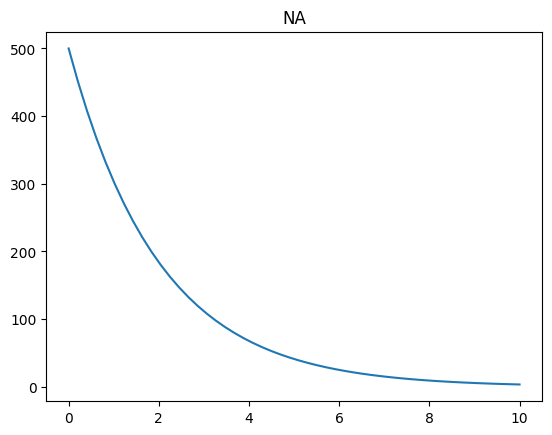

In [35]:
plt.plot(t, y1_solution, label='y1')
plt.title('NA')
plt.show()

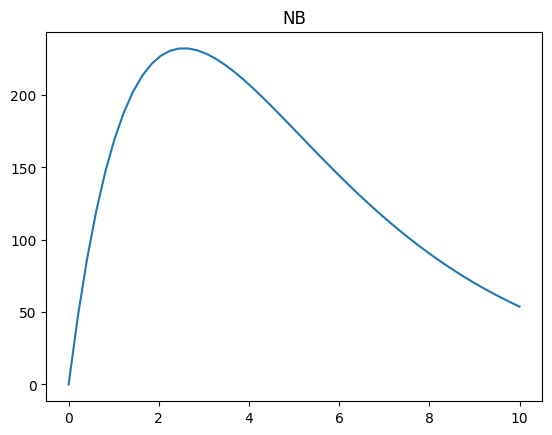

In [21]:
plt.plot(t, y2_solution, label='y1')
plt.title('NB')
plt.show()

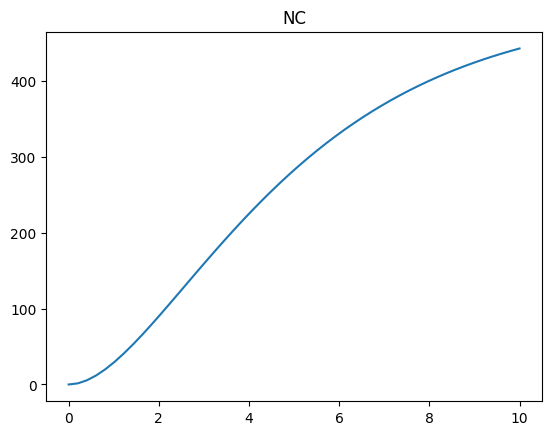

In [22]:
plt.plot(t, y3_solution, label='y1')
plt.title('NC')
plt.show()

c)

In [ ]:
r0 = np.array([0.5,0.])
def Increment(f,r,t,h):
    
    state1 = np.array([r[0],r[1]])
    K1 = f(state1,t)
    
    state2 = np.array([r[0]+0.5*h*K1[0],r[1]+0.5*h*K1[1]])
    K2 = f(state2,t+0.5*h)
    
    state3 = np.array([r[0]+0.5*h*K2[0],r[1]+0.5*h*K2[1]])
    K3 = f(state3,t+0.5*h)
    
    state4 = np.array([r[0]+h*K3[0],r[1]+h*K3[1]])
    K4 = f(state4, t+h)
    
    Deltaf = h*(K1+2*K2+2*K3+K4)/6
    
    return r+Deltaf
def CheckStep(Delta1,Delta2,Delta3,h,minimo=1e-2,maximo=1e-1):
    
    tolerancia = 0.0001
    
    Delta1 = np.abs(Delta1)
    Delta2 = np.abs(Delta2)
    Delta3 = np.abs(Delta3)
    
    if Delta1 < tolerancia:
        h = minimo
        dx = Delta1
        
    else:
        
        if np.abs((Delta1 - Delta2))/Delta1 > maximo:
            h = 0.5*h
            dx = Delta2
        
        elif np.abs((Delta1-Delta3))/Delta1 < minimo:
            h = 2*h
            dx = Delta3
        
        else:
            dx = Delta1
            
    return dx,h
def Adaptativo(f,x0,t):
    e = 0.0001
    h = t[1] - t[0]
    
    tf = t[-1]
    t = t[0]
    
    r = r0
    
    Time = np.array([t])
    Vector = r
    
    Steps = np.array([h])
    
    while t < tf:
        
        Delta1 = Increment(f,r,t,h)
        Delta2 = Increment(f,r,t+h,0.5*h)
        Delta3 = Increment(f,r,t,2*h)
        
        error=np.linalg.norm(Delta2-Delta3)
        if error < e:
            t+=2*h
            
            r=Delta3
            Vector = np.vstack((Vector,r))
        else:
            q=0.85*(e/error)**(1/4)
      
        Steps = np.append(Steps,h )
        Time = np.append(Time,t)
        
        
    return Time,Vector,Steps
t1,x1,h1 = Adaptativo(System,r0,t)

f)

In [32]:
max= np.max(y2_solution)
Position=np.where(y2_solution==max)
print("El momento en el cual la cantidad de particulas B es máxima es:")
print(t[Position], "horas")

El momento en el cual la cantidad de particulas B es máxima es:
[2.65306122] horas


g)

In [38]:
PC= y3_solution[Position]
print("A las", t[Position], "horas hay una cantidad de", max, "Particulas de B y ", PC, "Particulas de C.")

A las [2.65306122] horas hay una cantidad de 232.21284866825457 Particulas de B y  [135.08893688] Particulas de C.
